In [1]:
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('train-HR_AV.csv')

In [4]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [5]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [6]:
data.shape

(54808, 14)

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

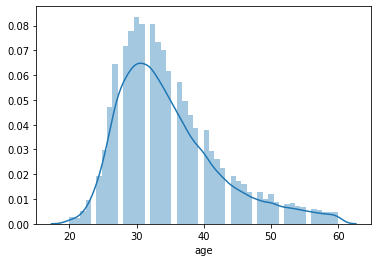

In [8]:
sns.distplot(data.age)

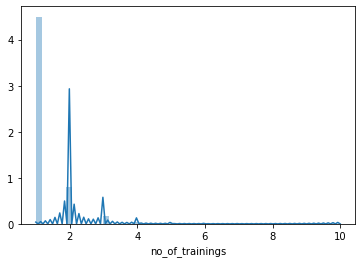

In [9]:
sns.distplot(data.no_of_trainings)

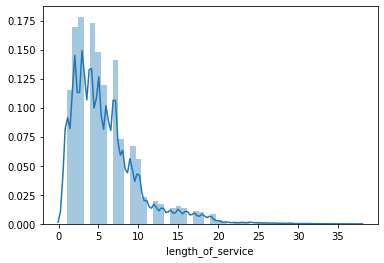

In [10]:
sns.distplot(data.length_of_service)

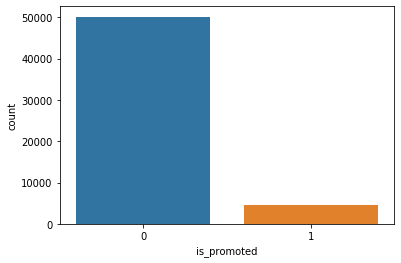

In [11]:
sns.countplot(x=data.is_promoted) #unbalanced dataset

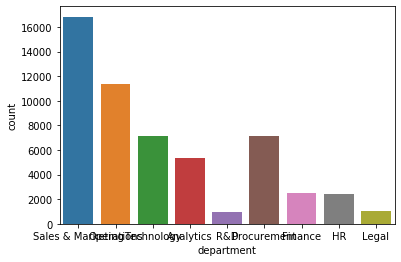

In [12]:
sns.countplot(x=data.department)

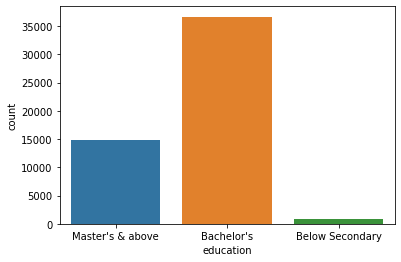

In [13]:
sns.countplot(x=data.education)

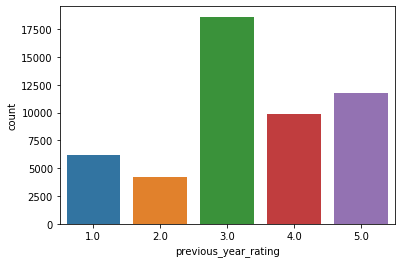

In [14]:
sns.countplot(x=data.previous_year_rating)

In [8]:
#Dealing with missing data
data.education = data.education.replace(np.nan, 'Other')

In [9]:
data.previous_year_rating = data.previous_year_rating.replace(np.nan,0)

In [10]:
data.info() #dataset has no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               54808 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    54808 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


#### Data Pre-processing 

In [11]:
#replace gender values - male as 1 and female as o
data.gender.replace(['m','f'],[1,0],inplace=True)

In [12]:
data.drop(['employee_id'],axis=1,inplace=True)

In [13]:
data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,0,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,1,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,1,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,1,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,1,other,1,45,3.0,2,0,0,73,0


#### Feature Selection
We now identify the significant variables from our dataset using various tests.
<br> For categorical variables we use Chi-Square Test 

In [21]:
#Create Contigency table for Region column and is_promoted col
ct_region = pd.crosstab(data['region'],data['is_promoted'])
ct_region

is_promoted,0,1
region,,
region_1,552,58
region_10,597,51
region_11,1241,74
region_12,467,33
region_13,2418,230
region_14,765,62
region_15,2586,222
region_16,1363,102
region_17,687,109


In [22]:
from scipy.stats import chi2_contingency
stat,pvalue,DOF,expected_R = chi2_contingency(ct_region)

if pvalue <= 0.05:
    print("Alternate Hypothesis passed. Region and Promotion have any relationship")
else:
    print("Null Hypothesis passed. Region and Promotion doesn't have any relationship")

Alternate Hypothesis passed. Region and Promotion have any relationship


In [23]:
#Create Contigency table for Education column and is_promoted col
ct_education = pd.crosstab(data['education'],data['is_promoted'])

In [24]:
from scipy.stats import chi2_contingency
stat,pvalue,DOF,expected_R = chi2_contingency(ct_education)

if pvalue <= 0.05:
    print("Alternate Hypothesis passed. Education and Promotion have any relationship")
else:
    print("Null Hypothesis passed. Education and Promotion doesn't have any relationship")

Alternate Hypothesis passed. Education and Promotion have any relationship


In [25]:
#Create Contigency table for Department column and is_promoted col
ct_department = pd.crosstab(data['department'],data['is_promoted'])

In [26]:
from scipy.stats import chi2_contingency
stat,pvalue,DOF,expected_R = chi2_contingency(ct_department)

if pvalue <= 0.05:
    print("Alternate Hypothesis passed. Department and Promotion have any relationship")
else:
    print("Null Hypothesis passed. Department and Promotion doesn't have any relationship")

Alternate Hypothesis passed. Department and Promotion have any relationship


In [27]:
#Create Contigency table for recruitment_channel column and is_promoted col
ct_rc = pd.crosstab(data['recruitment_channel'],data['is_promoted'])

In [28]:
from scipy.stats import chi2_contingency
stat,pvalue,DOF,expected_R = chi2_contingency(ct_rc)

if pvalue <= 0.05:
    print("Alternate Hypothesis passed. Recruitment_Channel and Promotion have any relationship")
else:
    print("Null Hypothesis passed. Recruitment_Channel and Promotion doesn't have any relationship")

Alternate Hypothesis passed. Recruitment_Channel and Promotion have any relationship


<br> We applied Chi-Square for all four categorial variables and found that all the categorical variables have a relationship with target variable so we don't remove any of the variables

Since the numerical variables are not Gaussian distributed, we perform Non-Parametric Tests

In [29]:
#1. Willcoxon test
from scipy.stats import wilcoxon
stats,pvalue = wilcoxon(data['gender'],data['no_of_trainings'])

if pvalue <= 0.05:
    print("Alternate Hypothesis passed. Gender and Trainings  are different")
else:
    print("Null Hypothesis passed. Gender and Trainings  are not different")

Alternate Hypothesis passed. Gender and Trainings  are different


In [30]:
#1. Willcoxon test
from scipy.stats import wilcoxon
stats,pvalue = wilcoxon(data['awards_won?'],data['avg_training_score'])

if pvalue <= 0.05:
    print("Alternate Hypothesis passed. Awards_Won and Trainings  are different")
else:
    print("Null Hypothesis passed. Gender and Trainings  are not different")

Alternate Hypothesis passed. Awards_Won and Trainings  are different


In [31]:
#1. Willcoxon test
from scipy.stats import wilcoxon
stats,pvalue = wilcoxon(data['length_of_service'],data['previous_year_rating'])

if pvalue <= 0.05:
    print("Alternate Hypothesis passed. Length of Service and Ratings are different")
else:
    print("Null Hypothesis passed. Length of Service and Ratings are not different")

Alternate Hypothesis passed. Length of Service and Ratings are different


In [32]:
#1. Willcoxon test
from scipy.stats import wilcoxon
stats,pvalue = wilcoxon(data['age'],data['length_of_service'])

if pvalue <= 0.05:
    print("Alternate Hypothesis passed. Length of Service and Age are different")
else:
    print("Null Hypothesis passed. Length of Service and Age are not different")

Alternate Hypothesis passed. Length of Service and Age are different


In [33]:
#implement Chi-Sqaure test
#Create Contigency table for gender column and is_promoted col
ct_gender = pd.crosstab(data['gender'],data['is_promoted'])

In [34]:
from scipy.stats import chi2_contingency
stat,pvalue,DOF,expected_R = chi2_contingency(ct_gender)

if pvalue <= 0.05:
    print("Alternate Hypothesis passed. Gender and Promotion have any relationship")
else:
    print("Null Hypothesis passed. Gender and Promotion doesn't have any relationship")

Alternate Hypothesis passed. Gender and Promotion have any relationship


In [35]:
ct_age = pd.crosstab(data['age'],data['is_promoted'])

In [36]:
from scipy.stats import chi2_contingency
stat,pvalue,DOF,expected_R = chi2_contingency(ct_age)

if pvalue <= 0.05:
    print("Alternate Hypothesis passed. Age and Promotion have any relationship")
else:
    print("Null Hypothesis passed. Age and Promotion doesn't have any relationship")

Alternate Hypothesis passed. Age and Promotion have any relationship


In [37]:
ct_awards = pd.crosstab(data['awards_won?'],data['is_promoted'])

In [38]:
from scipy.stats import chi2_contingency
stat,pvalue,DOF,expected_R = chi2_contingency(ct_awards)

if pvalue <= 0.05:
    print("Alternate Hypothesis passed. Awards and Promotion have any relationship")
else:
    print("Null Hypothesis passed. Awards and Promotion doesn't have any relationship")

Alternate Hypothesis passed. Awards and Promotion have any relationship


In [39]:
ct_training_score = pd.crosstab(data['avg_training_score'],data['is_promoted'])

In [40]:
from scipy.stats import chi2_contingency
stat,pvalue,DOF,expected_R = chi2_contingency(ct_training_score)

if pvalue <= 0.05:
    print("Alternate Hypothesis passed. Training Score and Promotion have any relationship")
else:
    print("Null Hypothesis passed. Training Score and Promotion doesn't have any relationship")

Alternate Hypothesis passed. Training Score and Promotion have any relationship


In [41]:
ct_rating = pd.crosstab(data['previous_year_rating'],data['is_promoted'])

In [42]:
from scipy.stats import chi2_contingency
stat,pvalue,DOF,expected_R = chi2_contingency(ct_rating)

if pvalue <= 0.05:
    print("Alternate Hypothesis passed. Rating and Promotion have any relationship")
else:
    print("Null Hypothesis passed. Rating and Promotion doesn't have any relationship")

Alternate Hypothesis passed. Rating and Promotion have any relationship


In [43]:
ct_kpi = pd.crosstab(data['KPIs_met >80%'],data['is_promoted'])

In [44]:
from scipy.stats import chi2_contingency
stat,pvalue,DOF,expected_R = chi2_contingency(ct_kpi)

if pvalue <= 0.05:
    print("Alternate Hypothesis passed. KPI's Met and Promotion have any relationship")
else:
    print("Null Hypothesis passed. KPI's Met and Promotion doesn't have any relationship")

Alternate Hypothesis passed. KPI's Met and Promotion have any relationship


In [45]:
ct_length_service = pd.crosstab(data['length_of_service'],data['is_promoted'])

In [46]:
from scipy.stats import chi2_contingency
stat,pvalue,DOF,expected_R = chi2_contingency(ct_length_service)

if pvalue <= 0.05:
    print("Alternate Hypothesis passed. Length of Service and Promotion have any relationship")
else:
    print("Null Hypothesis passed. Length of Service and Promotion doesn't have any relationship")

Alternate Hypothesis passed. Length of Service and Promotion have any relationship


In [14]:
data_copy = data.copy(deep=True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
department              54808 non-null object
region                  54808 non-null object
education               54808 non-null object
gender                  54808 non-null int64
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    54808 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(4)
memory usage: 5.4+ MB


In [16]:
data_cat = data.iloc[:,[0,1,2,3,4]]
data_num = data.iloc[:,[5,6,7,8,9,10,11]]
x = data_num.columns

In [17]:
#1.Perform Feature Scaling (Normalization) for numerical variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_num = sc.fit_transform(data_num)

In [18]:
#Perform Label Encoding for data_cat
from sklearn.preprocessing import LabelEncoder
le_dept = LabelEncoder()
le_region = LabelEncoder()
le_education = LabelEncoder()
le_rc = LabelEncoder()
le_gender = LabelEncoder()
data_cat['department'] = le_dept.fit_transform(data_cat.department)
data_cat['region'] = le_region.fit_transform(data_cat.region)
data_cat['education'] = le_education.fit_transform(data_cat.education)
data_cat['recruitment_channel'] = le_rc.fit_transform(data_cat.recruitment_channel)
data_cat['gender'] = le_gender.fit_transform(data_cat.gender)

In [19]:
data_cat.head()

,department,region,education,gender,recruitment_channel
0,7,31,2,0,2
1,4,14,0,1,0
2,7,10,0,1,2
3,7,15,0,1,0
4,8,18,0,1,0


In [20]:
# Perform One Hot Encoding
from sklearn.preprocessing import OneHotEncoder
dept_ohe = OneHotEncoder()
region_ohe = OneHotEncoder()
education_ohe = OneHotEncoder()
rc_ohe = OneHotEncoder()
gender_ohe = OneHotEncoder()
Xd = dept_ohe.fit_transform(data_cat.department.values.reshape(-1,1)).toarray()
Xr = region_ohe.fit_transform(data_cat.region.values.reshape(-1,1)).toarray()
Xe = education_ohe.fit_transform(data_cat.education.values.reshape(-1,1)).toarray()
Xrc = rc_ohe.fit_transform(data_cat.recruitment_channel.values.reshape(-1,1)).toarray()
Xg = gender_ohe.fit_transform(data_cat.gender.values.reshape(-1,1)).toarray()

In [21]:
dataOneHot = pd.DataFrame(Xd, columns = ["Dept_"+str(int(i)) for i in range(Xd.shape[1])])
data_cat = pd.concat([data_cat, dataOneHot], axis=1)
dataOneHot = pd.DataFrame(Xr, columns = ["Region_"+str(int(i)) for i in range(Xr.shape[1])])
data_cat = pd.concat([data_cat, dataOneHot], axis=1)
dataOneHot = pd.DataFrame(Xe, columns = ["Education_"+str(int(i)) for i in range(Xe.shape[1])])
data_cat = pd.concat([data_cat, dataOneHot], axis=1)
dataOneHot = pd.DataFrame(Xrc, columns = ["Channel_"+str(int(i)) for i in range(Xrc.shape[1])])
data_cat = pd.concat([data_cat, dataOneHot], axis=1)
dataOneHot = pd.DataFrame(Xg, columns=["Gender_"+str(int(i)) for i in range(Xg.shape[1])])
data_cat = pd.concat([data_cat, dataOneHot], axis=1)

In [22]:
data_cat.drop(columns=['department','region','education','recruitment_channel','gender'],inplace=True)

In [23]:
data_cat.head()

,Dept_0,Dept_1,Dept_2,Dept_3,Dept_4,Dept_5,Dept_6,Dept_7,Dept_8,Region_0,...,Region_33,Education_0,Education_1,Education_2,Education_3,Channel_0,Channel_1,Channel_2,Gender_0,Gender_1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [24]:
data_num = pd.DataFrame(data_num)

In [25]:
data_num.columns = x

In [26]:
data_num.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,-0.415276,0.025598,1.283878,0.500460,1.356878,-0.154018,-1.075931
1,-0.415276,-0.627135,1.283878,-0.437395,-0.736986,-0.154018,-0.253282
2,-0.415276,-0.104948,-0.052623,0.265996,-0.736986,-0.154018,-1.001145
3,1.226063,0.547785,-1.389124,0.969387,-0.736986,-0.154018,-1.001145
4,-0.415276,1.331064,-0.052623,-0.906322,-0.736986,-0.154018,0.718939


In [27]:
dataFinal = pd.concat([data_num,data_cat],axis=1)

In [28]:
dataFinal.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,Dept_0,Dept_1,Dept_2,...,Region_33,Education_0,Education_1,Education_2,Education_3,Channel_0,Channel_1,Channel_2,Gender_0,Gender_1
0,-0.415276,0.025598,1.283878,0.500460,1.356878,-0.154018,-1.075931,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,-0.415276,-0.627135,1.283878,-0.437395,-0.736986,-0.154018,-0.253282,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-0.415276,-0.104948,-0.052623,0.265996,-0.736986,-0.154018,-1.001145,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,1.226063,0.547785,-1.389124,0.969387,-0.736986,-0.154018,-1.001145,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-0.415276,1.331064,-0.052623,-0.906322,-0.736986,-0.154018,0.718939,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [29]:
dataFinal.shape

(54808, 59)

In [30]:
features = dataFinal.copy(deep=True).values

In [31]:
features.shape

(54808, 59)

In [32]:
label = data.iloc[:,12].values
label

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
label = label.reshape((-1,1))
label.shape

(54808, 1)

In [242]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
x_train,x_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state=147)

model = RandomForestClassifier()
model.fit(x_train,y_train)
train = model.score(x_train,y_train)
test = model.score(x_test,y_test)
print("Test: {},Train: {}".format(test,train))

Test: 0.9343185550082101,Train: 0.9998175432194499


In [243]:
#check the quality of the model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,modelBag.predict(x_test))
cm

array([[10011,    11],
       [  109,   831]], dtype=int64)

In [244]:
from sklearn.metrics import classification_report
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     10022
           1       0.84      0.29      0.43       940

    accuracy                           0.93     10962
   macro avg       0.89      0.64      0.70     10962
weighted avg       0.93      0.93      0.92     10962



In [245]:
# calculate precision-recall curve
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test,model.predict(x_test))

In [246]:
precision,recall

(array([0.08575078, 0.83950617, 1.        ]),
 array([1.       , 0.2893617, 0.       ]))

In [247]:
from sklearn.metrics import f1_score  #this model gave an accuracy of 40 for test set
f1 = f1_score(y_test,model.predict(x_test))
f1

0.430379746835443

In [193]:
# calculate precision-recall AUC 
from sklearn.metrics import auc
auc = auc(recall, precision)

0.5965640033993028


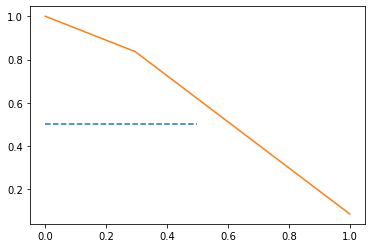

In [194]:
plt.figure()
print(auc)
plt.plot([0,0.5],[0.5,0.5],linestyle='--')
plt.plot(recall,precision)

Now we try using other models

Logistic performs better than Random Forest, Decision Tree

In [195]:
test = pd.read_csv('test-HR_AV.csv')

In [196]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
employee_id             23490 non-null int64
department              23490 non-null object
region                  23490 non-null object
education               22456 non-null object
gender                  23490 non-null object
recruitment_channel     23490 non-null object
no_of_trainings         23490 non-null int64
age                     23490 non-null int64
previous_year_rating    21678 non-null float64
length_of_service       23490 non-null int64
KPIs_met >80%           23490 non-null int64
awards_won?             23490 non-null int64
avg_training_score      23490 non-null int64
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [197]:
test.education = test.education.replace(np.nan, 'Other')

In [198]:
test.previous_year_rating = test.previous_year_rating.replace(np.nan,0)

In [199]:
test.gender.replace(['m','f'],[1,0],inplace=True)

In [200]:
test_cat = test.iloc[:,[1,2,3,4,5]]
test_num = test.iloc[:,[6,7,8,9,10,11,12]]
y = test_num.columns

In [201]:
#1.Perform Feature Scaling (Normalization) for numerical variables
test_num = sc.transform(test_num)

In [202]:
#Perform Label Encoding for test_cat
test_cat['department'] = le_dept.transform(test_cat.department)
test_cat['region'] = le_region.transform(test_cat.region)
test_cat['education'] = le_education.transform(test_cat.education)
test_cat['recruitment_channel'] = le_rc.transform(test_cat.recruitment_channel)
test_cat['gender'] = le_gender.transform(test_cat.gender)

In [203]:
Xd = dept_ohe.transform(test_cat.department.values.reshape(-1,1)).toarray()
Xr = region_ohe.transform(test_cat.region.values.reshape(-1,1)).toarray()
Xe = education_ohe.transform(test_cat.education.values.reshape(-1,1)).toarray()
Xrc = rc_ohe.transform(test_cat.recruitment_channel.values.reshape(-1,1)).toarray()
Xg = gender_ohe.transform(test_cat.gender.values.reshape(-1,1)).toarray()

In [204]:
testOneHot = pd.DataFrame(Xd, columns = ["Dept_"+str(int(i)) for i in range(Xd.shape[1])])
test_cat = pd.concat([test_cat, testOneHot], axis=1)
testOneHot = pd.DataFrame(Xr, columns = ["Region_"+str(int(i)) for i in range(Xr.shape[1])])
test_cat = pd.concat([test_cat, testOneHot], axis=1)
testOneHot = pd.DataFrame(Xe, columns = ["Education_"+str(int(i)) for i in range(Xe.shape[1])])
test_cat = pd.concat([test_cat, testOneHot], axis=1)
testOneHot = pd.DataFrame(Xrc, columns = ["Channel_"+str(int(i)) for i in range(Xrc.shape[1])])
test_cat = pd.concat([test_cat, testOneHot], axis=1)
testOneHot = pd.DataFrame(Xg, columns=["Gender_"+str(int(i)) for i in range(Xg.shape[1])])
test_cat = pd.concat([test_cat, testOneHot], axis=1)

In [205]:
test_cat.head()

,department,region,education,gender,recruitment_channel,Dept_0,Dept_1,Dept_2,Dept_3,Dept_4,...,Region_33,Education_0,Education_1,Education_2,Education_3,Channel_0,Channel_1,Channel_2,Gender_0,Gender_1
0,8,18,0,1,2,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,2,28,0,0,0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,7,4,0,1,0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,5,11,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1,21,0,1,2,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [206]:
test_cat.drop(columns=['department','region','education','recruitment_channel','gender'],inplace=True)

In [207]:
test_num = pd.DataFrame(test_num)

In [208]:
test_num.columns = y

In [209]:
testFinal = pd.concat([test_num,test_cat],axis=1)

In [210]:
testFinal.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,Dept_0,Dept_1,Dept_2,...,Region_33,Education_0,Education_1,Education_2,Education_3,Channel_0,Channel_1,Channel_2,Gender_0,Gender_1
0,-0.415276,-1.410415,-2.057375,-1.140785,1.356878,-0.154018,1.018084,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,-0.415276,-0.496588,-0.052623,-0.202931,-0.736986,-0.154018,-0.926359,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.415276,-0.496588,-1.389124,-0.437395,-0.736986,-0.154018,-1.225504,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,2.867403,-0.496588,-0.720874,0.734923,-0.736986,-0.154018,0.120649,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-0.415276,-0.627135,0.615627,0.265996,-0.736986,-0.154018,-0.178496,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [212]:
predicted = model.predict(testFinal)

In [213]:
submission_rfc = pd.DataFrame({'employee_id': test.employee_id,
             'is_promoted': predicted})

In [216]:
submission_rfc.to_csv('Submission_RFC.csv',index=False)

In [ ]:
#After submitting the test file the F-1 score was 0.42
#The maximum score achieved in the competition is 0.53